In [1]:
from vcat import ImageData, ImageCube
from vcat.graph_generator import KinematicPlot
import glob
from IPython.display import Video

2025-03-25 21:22:38,530 - INFO - vcat - Logging initialized. Log file: Console only.
2025-03-25 21:22:38,530 - INFO - vcat - No environment variable VCAT_CONFIG found, will use defaults.
2025-03-25 21:22:38,531 - INFO - vcat - Using DIFMAP path: /usr/local/difmap/uvf_difmap_2.5g/


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


2025-03-25 21:22:39,099 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:22:39,275 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method



Image of the source 3C111 at frequency 15.2 GHz on 2014-05-08 
    Total cleaned flux: 3474.345 mJy 
    Image Noise: 0.252 mJy using method 'Histogram Fit'
No polarization data loaded.
Model information: 
    Model Flux: 3472.457 mJy 
    Number of Components: 12


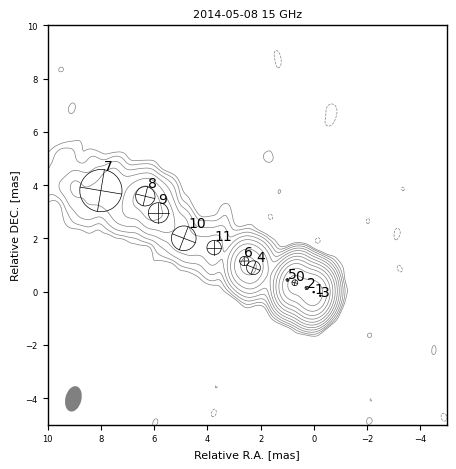

In [2]:
#Let's load an image with modelfit first
dataU=ImageData("../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.fits",
       model="../dataset_example/3C111_U_2014_05_08/3C111_U_2014_05_08.mfit") #this can be either .fits or .mod file

#let's print some info and plot it with the modelcomps and automatically associated ids
print(dataU)
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

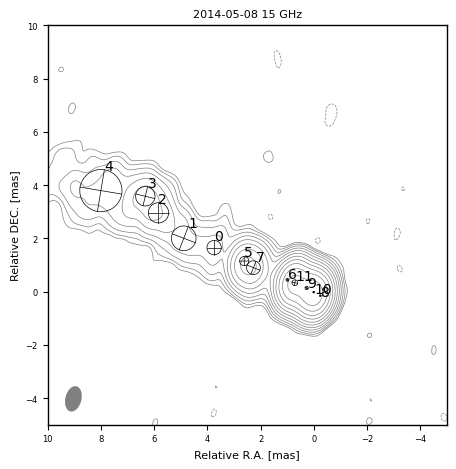

In [3]:
#Let's modify the component IDs and assign them to our liking.
#Let's first use a list of the old comp_ids
old_ids=[0,1,2,3,4,5,6,7,8,9,10,11]

#and now the new IDs that we want to assign them
new_ids=[11,10,9,8,7,6,5,4,3,2,1,0]

#and finally execute the change
dataU.change_component_ids(old_ids,new_ids)

#we also want to assign the core component to be comp 1
dataU.set_core_component(1)

#let's plot it again
dataU.plot(plot_model=True,plot_comp_ids=True,xlim=[10,-5],ylim=[-5,10])

In [4]:
#Let's check if the core assignment worked   
print(dataU.get_core_component())

Component with ID 1 at frequency 15.2 GHz
x: 4.88mas, y:2.00mas
Maj: 0.93mas, Min: 0.93, PA: -21.037599563598633°
Flux: 0.027979200705885887 Jy, Distance to Core: 0.00 mas



In [5]:
#Similarly we can get info about any other component 
print(dataU.get_component(10))

Component with ID 10 at frequency 15.2 GHz
x: 0.00mas, y:-0.02mas
Maj: 0.06mas, Min: 0.06, PA: -141.33999633789062°
Flux: 0.8844209909439087 Jy, Distance to Core: 5.28 mas



In [ ]:
#Let's load some more data
dataC=ImageData("../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.fits",
        model="../dataset_example/3C111_C_2014_05_08/3C111_C_2014_05_08.mfit")
dataQ=ImageData("../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.fits",
        model="../dataset_example/3C111_Q_2014_05_08/3C111_Q_2014_05_08.mfit")
dataW=ImageData("../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.fits",
        model="../dataset_example/3C111_W_2014_05_08/3C111_W_2014_05_08.mfit")
dataX=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits",
        model="../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.mfit")

#Now we have to manually associate the components to the right ID, this is a bit tedious and will soon be replaced with a GUI version
#For now, let's use the following associations:

old_ids=[]
new_ids=[]
core_id=0

dataQ.change_component_ids(old_ids,new_ids)
dataQ.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=0

dataW.change_component_ids(old_ids,new_ids)
dataW.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=4

dataX.change_component_ids(old_ids,new_ids)
dataX.set_core_component(core_id)

old_ids=[]
new_ids=[]
core_id=6

dataC.change_component_ids(old_ids,new_ids)
dataC.set_core_component(core_id)

2025-03-25 21:22:54,528 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:22:54,853 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:02,038 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:02,062 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:07,351 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:07,360 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:10,001 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method
2025-03-25 21:23:10,328 - WARNING - vcat - Could not do Histogram Fit for noise, will use 'box' method


In [ ]:
#Now that all components were correctly identified, we will load the images as an ImageCube for easier handling
im_cube=ImageCube([dataC,dataX,dataU,dataQ,dataW])

#let's double check the associations
im_cube.plot(plot_model=True,plot_comp_ids=True)

In [ ]:
#That looks good, let's see if we can fit a component spectrum to specific components
#We can call this directly on the image cube
comp_id=1
im_cube.fit_comp_spectrum(comp_id,plot=True)

In [ ]:
#In addition to the component spectrum, we can also derive the core shift, based on a given component
im_cube.fit_coreshift(5,plot=True)

In [ ]:
#Additionally, we can have a look at different jet profiles, based on the modelfits.
#Let's say we want to plot the jet collimation profile, this can be done using:
x,y=im_cube.get_model_profile("maj") #other options are 'flux','tb'

In [ ]:
#So far we have looked at a single-epoch multi-frequency dataset
#Let's also have a look at a single-frequency multi-epoch dataset

#We will load some MOJAVE epochs of 0506+056 where modelfits were performed
uvf_files=glob.glob("../dataset_example/0506+056_kinematic/*.uvf")
model_files=glob.glob("../dataset_example/0506+056_kinematic/*fits")

#Let's load them as an ImageCube
im_cube=ImageCube().import_files(uvf_files=uvf_files,model_fits_files=model_files)

In [ ]:
#We have already used the VCAT GUI to assign the component numbers, so we can load a component_info.csv file
im_cube.import_component_association("../dataset_example/0506+056_kinematic/component_info.csv")

In [ ]:
#We now have an ImageCube with correctly labelled components, that means we can call the kinematic fit functions

#Let's do a simple 1d linear fit of the core distance vs time
fit=im_cube.get_speed(order=1,show_plot=True)

#The returned fit parameter includes useful information about the apparent speed, critical Doppler_factor etc. of each component
print(fit)

In [ ]:
#Alternatively, we can fit x- and y-coordinates seperately, and we can choose a n-th order polynom to fit
order=2

#additionally, we can adjust the plot colors
colors=["green","purple","black","gray"]
fit=im_cube.get_speed2d(order=order,colors=colors,show_plot=True)

#Again, the returned fit dictionaries include important information about the performed fit, this time, for x- and y
print(fit)

In [ ]:
#If you are feeling very fancy, you can also create a movie of the moving components (useful for talks!)
plot_components=True
n_frames=200 #number of frames
interval=50 #milliseconds per frame
save="kinematic_movie.mp4" #output file name

#usual plot parameters can be used here as well
xlim=[5,-5]
ylim=[-7,3]

#Let's create the movie (NOTE: This may take some time!)
im_cube.movie(plot_components=plot_components,n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#Let's display the movie
Video(save, embed=True)

In [ ]:
#Optionally, we can also display the components with a colormap, according to their flux density
fill_components=True
component_cmap="inferno"
save="kinematic_movie2.mp4"

#Let's create another movie
im_cube.movie(plot_components=True,fill_components=fill_components,component_cmap=component_cmap,
              n_frames=n_frames,interval=interval,xlim=xlim,ylim=ylim,save=save)

#And display the movie
Video(save, embed=True)